In [11]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy
import numpy as np

In [12]:
data = pd.read_csv("./data.csv")
data

,No.,Time,Source,Destination,Protocol,Length,Info
0,2655,13.086280,192.168.15.4,192.168.15.3,MQTT,90,Connect Command
1,2656,13.086415,192.168.15.4,192.168.15.3,MQTT,68,Disconnect Req
2,2661,13.089032,192.168.15.4,192.168.15.3,MQTT,90,Connect Command
3,2662,13.089285,192.168.15.3,192.168.15.4,MQTT,70,Connect Ack
4,2667,13.091417,192.168.15.4,192.168.15.3,MQTT,97,Publish Message (id=1) [Deviceb'Device - 2']
...,...,...,...,...,...,...,...
34753,1712952,7044.912410,192.168.15.4,192.168.15.3,MQTT,90,Connect Command
34754,1712954,7044.915927,192.168.15.3,192.168.15.4,MQTT,70,Connect Ack
34755,1712955,7044.915967,192.168.15.4,192.168.15.3,MQTT,97,Publish Message (id=6951) [Deviceb'Device - 2']
34756,1712958,7044.918763,192.168.15.3,192.168.15.4,MQTT,70,Publish Ack (id=6951)


In [13]:
array_publish = []
array_publish_ack = []

for i in range(len(data)):
    if re.search("Publish Message", data.loc[i, "Info"]):
        array_publish.append(i)
    if re.search("Publish Ack ", data.loc[i, "Info"]):
        array_publish_ack.append(i)


In [14]:
RTT = pd.DataFrame(columns=["Time_publish", "Time_ack"])
for i in array_publish:
    init = re.search("id=", data.loc[i, "Info"]).span()[1]
    end = re.search("\)", data.loc[i, "Info"]).span()[0]
    index = data.loc[i, "Info"][init:end]
    RTT.loc[index,"Time_publish"]  = float(data.loc[i, "Time"])
    

for i in array_publish_ack:
    init = re.search("id=", data.loc[i, "Info"]).span()[1]
    end = re.search("\)", data.loc[i, "Info"]).span()[0]
    index = data.loc[i, "Info"][init:end]
    RTT.loc[index,"Time_ack"]  = float(data.loc[i, "Time"])


In [15]:
RTT["RTT"]  =(RTT["Time_ack"] - RTT["Time_publish"] )* 1000

In [16]:
RTT.head(5)

,Time_publish,Time_ack,RTT
1,13.091417,13.094317,2.900118
2,14.101079,14.103964,2.884309
3,15.110691,15.11395,3.259086
4,16.122623,16.125458,2.834835
5,17.132464,17.135337,2.873769


In [17]:
print("média = {}".format(RTT["RTT"].mean()))
print("mediana = {}".format(RTT["RTT"].median()))
print("máximo = {}".format(RTT["RTT"].max()))
print("minimo = {}".format(RTT["RTT"].min()))
print("25% = {}".format(RTT["RTT"].quantile(0.25)))
print("50% = {}".format(RTT["RTT"].quantile()))
print("75% = {}".format(RTT["RTT"].quantile(0.75)))
print("90% = {}".format(RTT["RTT"].quantile(0.90)))
print("95% = {}".format(RTT["RTT"].quantile(0.95)))
print("99% = {}".format(RTT["RTT"].quantile(0.99)))
print("std = {}".format(RTT["RTT"].std()))

média = 3.7665979538194843
mediana = 2.9608259999349684
máximo = 64.62880599974596
minimo = 2.3411159999113806
25% = 2.8483839999040583
50% = 2.9608259999349684
75% = 3.3356750002440094
90% = 6.7974039998262015
95% = 6.960320000189313
99% = 8.005711999885534
std = 2.1324274147845736


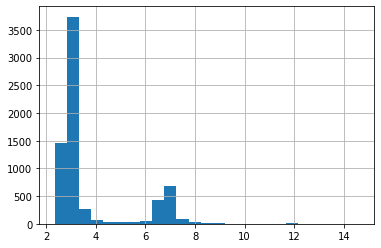

In [18]:
RTT["RTT"].loc[RTT["RTT"]>=8]
fig, ax=plt.subplots()
ax.hist(x=RTT["RTT"].loc[RTT["RTT"]<=14.799397240020642], bins=25)
ax.grid();

In [19]:
RTT

,Time_publish,Time_ack,RTT
1,13.091417,13.094317,2.900118
2,14.101079,14.103964,2.884309
3,15.110691,15.11395,3.259086
4,16.122623,16.125458,2.834835
5,17.132464,17.135337,2.873769
...,...,...,...
6947,7040.86923,7040.872286,3.056305
6948,7041.879625,7041.886464,6.838592
6949,7042.893474,7042.896336,2.862079
6950,7043.904513,7043.907529,3.016199
